In [7]:
import pandas as  pd
import numpy as np
import bokeh.plotting as bp
import matplotlib.pyplot as plt
%matplotlib inline
#bp.output_notebook()

Se importa el dataset, el cual lo obtuve de Quandl. Este representa el valor en USD de las acciones de PUMA SE diariamente.

In [14]:
data_set = pd.read_csv('../data/Quandl/stock-prices-PUMA.csv',index_col=0,parse_dates=True
                       ,infer_datetime_format=True)

In [15]:
data_set.head()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
Date,,,,,,,,,,
2018-03-23,NaN,400.5,382.0,385.5,NaN,30853.0,11991646.0,NaN,NaN,NaN
2018-03-22,NaN,411.5,398.5,399.0,NaN,29061.0,11754473.0,NaN,NaN,NaN
2018-03-21,NaN,419.0,404.5,412.5,NaN,42542.0,17543190.0,NaN,NaN,NaN
2018-03-20,NaN,421.5,385.5,415.0,NaN,53258.0,21873839.0,NaN,NaN,NaN
2018-03-19,NaN,393.5,387.5,392.5,NaN,15166.0,5936658.0,NaN,NaN,NaN


In [16]:
data_set.shape

(4694, 10)

Como ciertas fechas no tienen valor de "open", se promedió el valor mas alto y bajo del dia para tomarlo como "open"

In [17]:
for i in range(data_set.shape[0]):
    if pd.isnull(data_set['Open'].iloc[i]):
        data_set['Open'].iloc[i] = np.mean([data_set['High'].iloc[i],data_set['Low'].iloc[i]])

In [18]:
data_set = data_set.iloc[:,:4]

In [19]:
data_set.head()

,Open,High,Low,Close
Date,,,,
2018-03-23,391.25,400.5,382.0,385.5
2018-03-22,405.00,411.5,398.5,399.0
2018-03-21,411.75,419.0,404.5,412.5
2018-03-20,403.50,421.5,385.5,415.0
2018-03-19,390.50,393.5,387.5,392.5


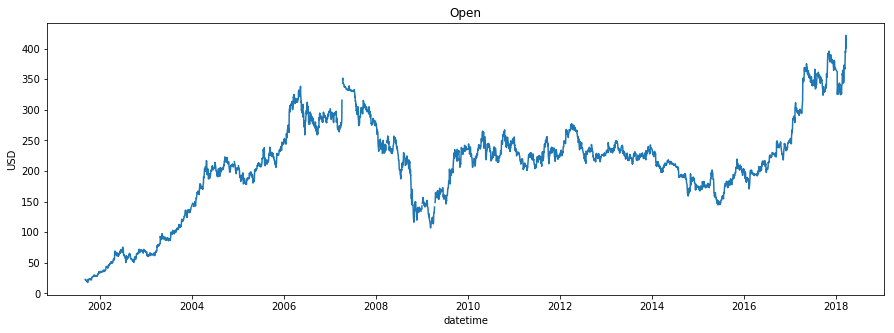

In [24]:
plt.figure(figsize=(15,5))
plt.title('Open')
plt.ylabel('USD')
plt.xlabel('datetime')
plt.plot(data_set.index.date[-1::-1], data_set.iloc[:,1][-1::-1]);

se puede ver que hay huecos, debido a que hay años donde nisiquiera figuran datos para el "ohlc", se eliminarán estos datos..

In [52]:
print('datos nan de open y high = ',sum((pd.isnull(data_set.iloc[:,0]) & pd.isnull(data_set.iloc[:,1]) ==True)*1))
print('datos nan de open y low = ',sum((pd.isnull(data_set.iloc[:,0]) & pd.isnull(data_set.iloc[:,2]) ==True)*1))
print('datos nan de high y low = ',sum((pd.isnull(data_set.iloc[:,1]) & pd.isnull(data_set.iloc[:,2]) ==True)*1))
print('datos nan de open y close = ',sum((pd.isnull(data_set.iloc[:,0]) & pd.isnull(data_set.iloc[:,1]) ==True)*1))

datos nan de open y high =  0
datos nan de open y low =  0
datos nan de high y low =  0
datos nan de open y close =  0


In [49]:
data_set = data_set.dropna()

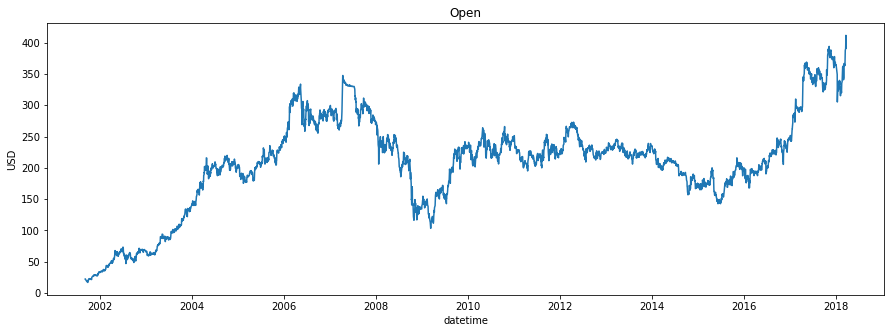

In [59]:
plt.figure(figsize=(15,5))
plt.title('Open')
plt.ylabel('USD')
plt.xlabel('datetime')
plt.plot(data_set.index.date[-1::-1], data_set.iloc[:,0][-1::-1]);

pintando con bokeh

In [51]:
plot = bp.figure(width=800, height=300,x_axis_type='datetime',title='Open price for PUMA SE')
plot.xaxis.axis_label = 'dates'
plot.yaxis.axis_label = 'stock price in USD'
plot.line(data_set.index[-1::-1],data_set.iloc[:,1][-1::-1])
bp.show(plot)

In [54]:
%run ../code/build_dataset.py
%run ../code/PNLEstimatorWrapper.py
%run ../code/redim.py
%run ../code/step_validation.py
%run ../code/v_split.py

In [67]:
X, y_reg, bt = build_dataset(data_set.iloc[:,0],binary_target=True,window=3, PNL=True)

In [74]:
from sklearn.neighbors import KNeighborsClassifier

y = bt

est = PNLEstimatorWrapper(KNeighborsClassifier(),'PNL')
result_KNC = step_validation(est, X, y, v_split(X,60,20,20))
result_KNC, predict_KNC = redim(result_KNC)

print('--------- KNeighborsClassifier ----------------')
print('average PNL : ', np.mean(result_KNC[:,0]))
print('average buy: ', np.mean(result_KNC[:,1]))
print('average sell: ', np.mean(result_KNC[:,2]))
print('-------------------------------------')
print(pd.DataFrame(result_KNC, columns=list(['PNL','buys','sells','longest_buys','longest_sells'])))

--------- KNeighborsClassifier ----------------
average PNL :  0.840098039216
average buy:  10.3921568627
average sell:  9.60784313725
-------------------------------------
       PNL  buys  sells  longest_buys  longest_sells
0     8.85   4.0   16.0           4.0           16.0
1     6.40   3.0   17.0           3.0           14.0
2    38.40   8.0   12.0           5.0            9.0
3    -3.90   1.0   19.0           1.0           19.0
4    19.20   3.0   17.0           2.0            9.0
5   -40.00   4.0   16.0           2.0            9.0
6   -17.60   6.0   14.0           2.0            5.0
7    -0.60   0.0   20.0           0.0           20.0
8   -63.60  19.0    1.0          14.0            1.0
9     2.95  12.0    8.0          12.0            6.0
10   14.95   9.0   11.0           9.0           11.0
11   -8.90  14.0    6.0          12.0            5.0
12   -3.10  18.0    2.0          14.0            1.0
13   12.10  11.0    9.0           8.0            9.0
14   26.20   9.0   11.0         